In [1]:
import sympy as sp
from sympy.plotting import plot
%matplotlib inline 

sp.init_printing()

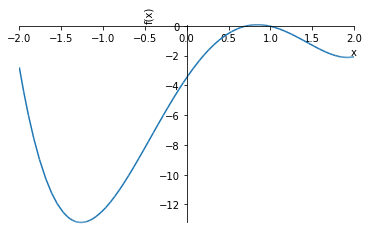

In [3]:
EPS = sp.Rational("1e-3")
x = sp.Symbol("x")
fun = x * x * x * x - 2 * x*x*x -3.74*x*x+8.18*x-3.48
plot(fun, (x, -2, 2))

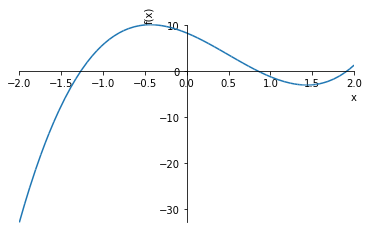

In [4]:
der = sp.diff(fun, x)
plot(der, (x, -2, 2))

In [5]:
alpha = sp.Symbol("alpha")
h = x - fun * alpha
h

In [6]:
def simple(x0, alpha, f=fun, eps=EPS):
    h = x - alpha * f
    x1 = h.subs(x, x0)
    print("[{}; {}]".format(x0, x1))
    while abs(x1 - x0) > EPS / sp.Integer(2):
        x0, x1 = x1, h.subs(x, x1)
        print("[{}; {}]".format(x0, x1))
    return x1

In [25]:
res = simple(x0=0, alpha=1/10*x+1/10)
"Result {}".format(sp.N(res, 10))

[0; 0.348000000000000]
[0.348000000000000; 0.503816825066803]
[0.503816825066803; 0.578924423845523]
[0.578924423845523; 0.622124029706605]
[0.622124029706605; 0.649752325531851]
[0.649752325531851; 0.668618903466477]
[0.668618903466477; 0.682072645256335]
[0.682072645256335; 0.691959783558491]
[0.691959783558491; 0.699385283206164]
[0.699385283206164; 0.705052349043797]
[0.705052349043797; 0.709430155357647]
[0.709430155357647; 0.712843556874527]
[0.712843556874527; 0.715524213288864]
[0.715524213288864; 0.717641279505443]
[0.717641279505443; 0.719320649002383]
[0.719320649002383; 0.720657475016041]
[0.720657475016041; 0.721724581442039]
[0.721724581442039; 0.722578270670696]
[0.722578270670696; 0.723262431093573]
[0.723262431093573; 0.723811502981020]
[0.723811502981020; 0.724252658774908]


'Result 0.7242526588'

In [26]:

def newton(x0, f=fun, d=der, eps=EPS):
    x1 = x0 - f.subs(x, x0) / der.subs(x, x0)
    print(x1)
    while sp.Abs(x1 - x0).evalf() > EPS / sp.Integer(2):
        x0, x1 = x1, x1 - f.subs(x, x1) / d.subs(x, x1)
        print(x1)
    return x1

In [27]:
res = newton(x0=sp.Rational("0.1"))
"Result {}".format(sp.N(res, 10))

0.466228308026030
0.633515501597301
0.704871277662534
0.724395728904157
0.726067733050235
0.726080087410390


'Result 0.7260800874'